In [24]:
import requests, re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Question 1
Task a:

In [25]:
#Get text
r = requests.get("https://raw.githubusercontent.com/aalanwar/Logical-Zonotope/refs/heads/main/README.md")

def count_occurrence(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return Counter(words)

Task b:

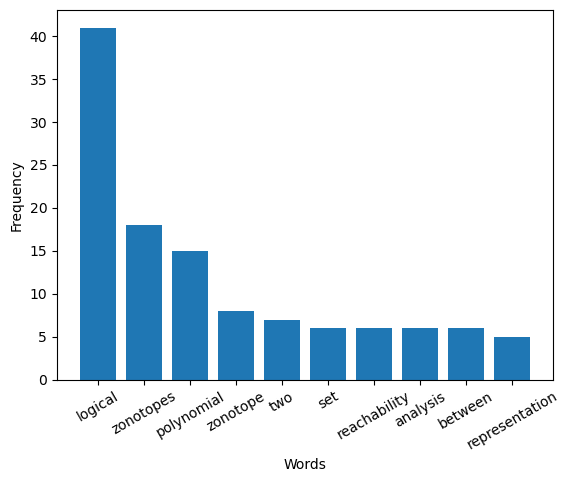

In [26]:
def count_occurrences_and_plot(text):
    words = re.findall(r'\b[a-z]+\b', text.lower())
    excluded_words = ['the', 'a', 'an', 'be', 'br', 'and', 'of', 'to', 'for', 'z', 'or', 'in', 'we', 'on']

    #remove word from the list if contained in excluded words list
    filtered_words = [word for word in words if word not in excluded_words]

    count = Counter(filtered_words)

    list = count.most_common(10)

    #Plot as histogram
    words, occurrences = zip(*list)
    plt.bar(words, occurrences)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=30)

    plt.show()

count_occurrences_and_plot(r.text)

Task c:

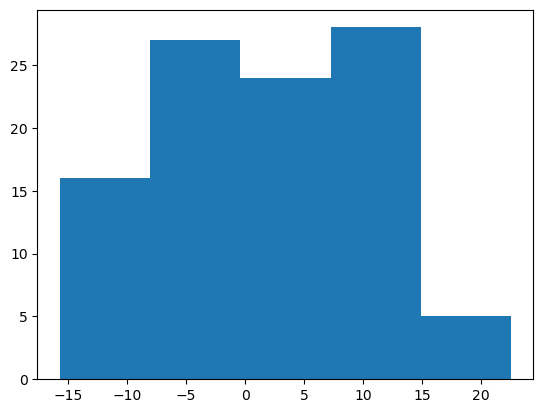

In [27]:
A = np.random.randn(100, 20)
v = np.random.normal(2,0.01,20)

c = np.dot(A,v)

mean = np.mean(c)
std = np.std(c)

#plot vector c as histogram with 5 bins
plt.hist(c, bins=5)
plt.show()

# Question 2


In [28]:
A_1 = np.random.normal(2,0.01,(100,2))
A_2 = np.random.normal(2,0.1,(100,2))
A_3 = np.random.normal(2,1,(100,2))



def simple_linear_regression(data):
    (x_mean, y_mean) = np.mean(data, axis=0)
    x_y = np.array([x_mean, y_mean])
    data1 = data - x_y
    product_numerator = data1[:, 0] * data1[:, 1]
    sum_product_numerator = np.sum(product_numerator)

    product_denominator = data1[:, 0] * data1[:, 0]
    sum_product_denominator = np.sum(product_denominator)

    beta_0 = sum_product_numerator / sum_product_denominator
    beta_1 = y_mean - beta_0 * x_mean

    return beta_0, beta_1



def predict_using_slg(data_point, beta_0, beta_1):
    target_prediction = beta_0 + beta_1 * data_point
    return target_prediction


Calculating $\beta_0$ and $\beta_1$ for Matrix $A_1$, $A_2$ and $A_3$ respectively and then using them to predict the targets.


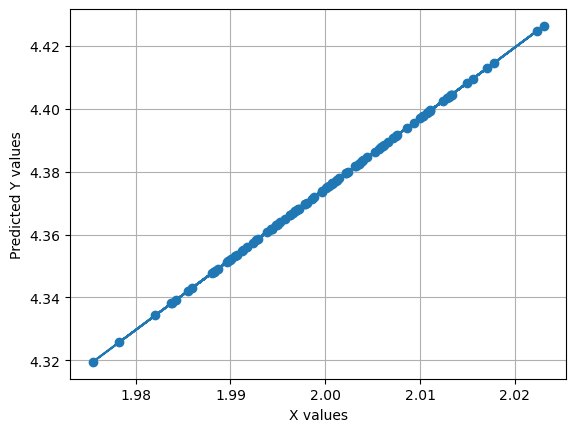

In [30]:
#Matrix A_1
beta_0, beta_1 = simple_linear_regression(A_1)
x_values = A_1[:,0]
predictions_A1 = np.array([[x, predict_using_slg(x, beta_0, beta_1)] for x in x_values])

#Matrix A_2
beta_0, beta_1 = simple_linear_regression(A_2)
x_values = A_2[:,0]
predictions_A2 = np.array([[x, predict_using_slg(x, beta_0, beta_1)] for x in x_values])

#Matrix A_3
beta_0, beta_1 = simple_linear_regression(A_3)
x_values = A_3[:,0]
predictions_A3 = np.array([[x, predict_using_slg(x, beta_0, beta_1)] for x in x_values])



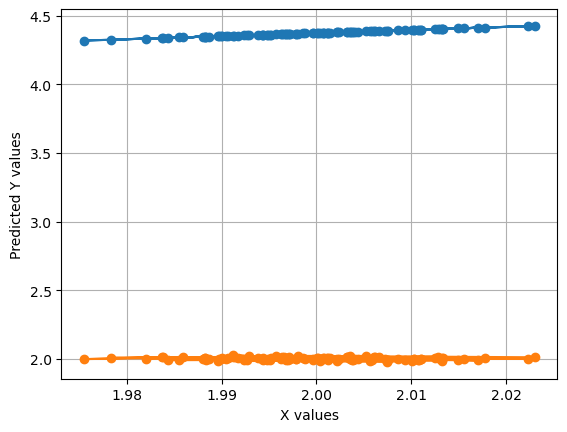

In [31]:

plt.plot(predictions_A1[:,0], predictions_A1[:,1], marker='o')
plt.plot(A_1[:,0], A_1[:,1], marker='o')
plt.xlabel('X values')
plt.ylabel('Predicted Y values')
plt.grid(True)
plt.show()

In [ ]:

plt.plot(predictions_A2[:,0], predictions_A2[:,1], marker='o')
plt.xlabel('X values')
plt.ylabel('Predicted Y values')
plt.grid(True)
plt.show()

In [ ]:

plt.plot(predictions_A1[:,0], predictions_A1[:,1], marker='o')
plt.xlabel('X values')
plt.ylabel('Predicted Y values')
plt.grid(True)
plt.show()